# Amostragem de VA's

* Box Mueller
* Transformada Inversa 
* Aceitação-Rejeição
* Importance Sampling

In [1]:
from scipy import stats
from math import sqrt, pi, cos, log, exp
import matplotlib.pyplot as plt
import numpy as np

## Exercício 1.

Gerando distribuição Normal com método de Box Mueller, gerando inicialmente uma V.A. $X_{1}$ através de uma Uniforme U(0,1) e calculando:

$cos(2\pi X_{1}) * \sqrt{-2 \ln X_{1}}$

É possível perceber que a distribuição gerada (visualizada no histograma) se ajusta bem à função de densidade de uma Gaussiana N(0,1).

In [2]:
def mynorm(N):
    values = []
    for _ in range(N):
        X1 = stats.uniform.rvs()
        rexp = stats.expon.rvs(scale=2) # EXP(1/2)
        values.append(sqrt(rexp) * cos(2 * pi * X1))
    return values

In [3]:
n = 10000
simulated_norm = mynorm(n)
x = np.linspace(-4, 4, n)
real_norm = stats.norm.pdf(x)

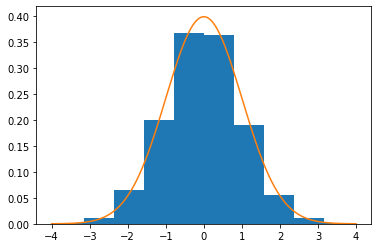

In [4]:
plt.hist(simulated_norm, density=True)
plt.plot(x, real_norm)
plt.show()

## Exercício 2

Gerando variáveis aleatórias para a densidade de probabilidade $f(x)$ utilizando 2 métodos: a) Transformada Inversa e b) aceitação-rejeição

$f(x) = \frac{2}{3} \sqrt{x}$



A) Transformada Inversa

$F(x) = x^{\frac{3}{2}}$

$F^{-1}(x) = x^{\frac{2}{3}}$

In [5]:
def transformada_inversa(N):
    values = []
    for _ in range(N):
        x = stats.uniform.rvs()
        values.append(x**(2/3))
    return values

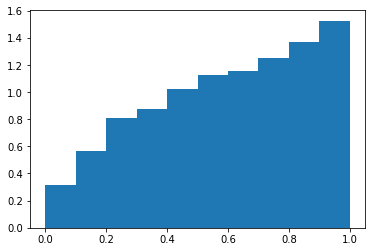

In [6]:
n = 10000
transformada = transformada_inversa(n)

plt.hist(transformada, density=True)
plt.show()

B) Aceitação-Rejeição

Utilizando a Uniforme(0,1) como densidade de comparação. É possível perceber o resultado similar ao obtido anteriormente. Para gerar 10000 v.a's da densidade de $f(x)$ com esse método foi necessário gerar 22502 valores da distribuição uniforme.

In [7]:
def f(x):
    return (np.sqrt(x) * 2/3)

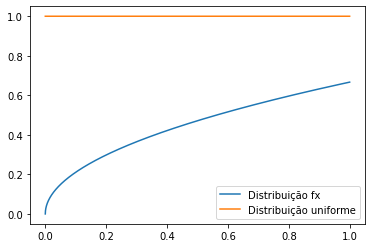

In [8]:
x = np.linspace(0, 1, n)
fx = f(x)
plt.plot(x, fx, label='Distribuição fx')

uniform = [stats.uniform.pdf(i) for i in x]
plt.plot(x, uniform, label='Distribuição uniforme')

plt.legend()
plt.show()

In [9]:
# Usando distribuição uniforme para aceitação/rejeição
def ac_rej(N):
    values = []
    uniform_generated = 0
    for _ in range(N):
        flag = True
        while flag:
            Y = stats.uniform.rvs()
            U = stats.uniform.rvs()
            uniform_generated += 1
            ry = f(Y) / 1
            if U <= ry:
                values.append(Y)
                flag = False
    return values, uniform_generated

In [10]:
values, uniform_generated = ac_rej(n)

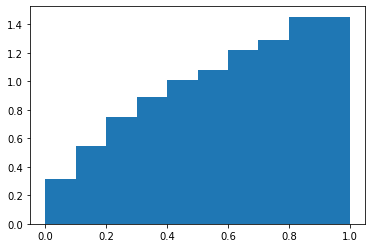

In [11]:
plt.hist(values, density=True)
plt.show()

In [12]:
uniform_generated

22282

## Exercício 3

Numa companhia de seguros, a tarefa é simular a perda financeira agregada L que a companhia
pode experimentar no próximo ano em um tipo de apólice. A perda é dada por L = X1 + . . . + XN
onde N é o número aleatório de sinistros que irão ocorrer com os muitos segurados e Xi é a perda
monetária associada com o i-ésimo sinistro.

Supondo que N ∼ Poisson(1.7) e que os Xi são i.i.d. com distribuição exp(1/10), obtenha um valor
simulado de L usando os seguintes valores i.i.d. U(0, 1): 0.672 para obter o valor simulado N; e
o que for necessário da sequência 0.936, 0.984, 0.198, 0.659, 0.379 para obter os Xi e assim obter
um valor para L. Repita o exercício obtendo um segundo valor simulado para L com a seguinte
sequência de valores i.i.d. U(0, 1): 0.013, 0.834, 0.926, 0.648, 0.717, 0.169

1. Simulando uma Poisson
Obtem-se os valores acumulados da Poisson(1.7) para k = 0,1,2,3,4 e considerando o valor Uniforme 0.672, o k escolhido é igual a 2, pois $0.4932 \leq 0.672 \leq 0.7572$. Logo, N = 2

In [13]:
k = [0, 1, 2, 3, 4]
cumulative = [stats.poisson.cdf(i, 1.7) for i in k]
cumulative

[0.1826835240527347,
 0.49324551494238356,
 0.7572232071985852,
 0.906810566143766,
 0.9703851936954679]

2. Obtendo valor de L = X1 + X2. Simulando uma exponencial exp(0.1) a partir dos valores 0.936 e 0.984.

In [14]:
exp1 = -10 * (log(0.936))
exp1

0.6613980250454494

In [15]:
exp2 = -10 * (log(0.984))
exp2

0.16129381929883643

In [16]:
L = exp1 + exp2
L

0.8226918443442859

3. Para a última sequência, como 0.013 < 0.1826 (acumulado da Poisson(1.7) para k=0), então N=0 e L=0

## Exercício 4

X e Y são duas variáveis aleatórias contínuas com funções distribuições acumuladas distintas e iguais a $F_{1}(x)$ e $F_{2}(y)$, respectivamente, com inversas $F^{−1}_{1}(u)$ e $F^{−1}_{2}(u)$. Verifique se as afirmações abaixo são verdadeiras para duas distribuições genéricas $F_{1}$ e $F_{2}$ distintas:

#### F1(X) ∼ U(0, 1)
Verdadeiro. Sendo $Z=F_{X}(X)$., então $F_{Z}(x) = P(F_{X}(X) \leq x) = P(X \leq F^{−1}_{X}(x)) = F_{X}(F^{−1}_{X}(x))=x$. Como é constante, está uniformemente distribuído.

#### Se um valor X maior que a mediana de sua distribuição for observado, então o valor F1(X) será maior que 1/2.
Verdadeiro. A mediana é 0.5 aplicado na função inversa de F. Logo, $F_{1}(x) > F_{1}(F^{-1}_{1}(0.5)) = 0.5$ 

#### Se U > 0.5 então $F^{−1}_{1}(U)$  > $F^{−1}_{1}(0.5)$ 
Verdadeiro. Idem ao item anterior.

#### $F^{−1}_{2}(F_{1}(X))$ tem a mesma distribuição que Y .
Verdadeiro. Como $F_{1}(X)$ ~ $U(0,1)$ é possível concluir que $F^{−1}_{2}(U)$ ~ $Y$

#### $F_{2}(Y)$ e $F_{1}(X)$ possuem a mesma distribuição.
Verdadeiro. Ambas são equivalentes à uniforme U(0,1)

#### $F_{2}(X)$ e $F_{1}(X)$ possuem a mesma distribuição (atenção: este item é diferente do anterior).
Falso. $F_{2}(X)$ não precisa ter distribuição Uniforme necessariamente.

#### $F^{−1}_{2}(U)$ e $F^{−1}_{1}(U)$ são i.i.d.
Falso. As inversas das funções acumuladas em U são equivalentes à Y e X, respectivamente, que são variáveis aleatórias distintas.

#### $F_{2}(Y)$ e $F_{1}(X)$ são i.i.d.
Falso. Não necessariamente. Caso X e Y tenham correlação, então elas não são independentes.

## Exercício 5

Use simulação Monte Carlo para estimar o volume do elipsóide
$x^2 + \frac{y^2}{4} + \frac{z^2}{16} \leq 1$
Você pode assumir que o elipsóide está contido no paralelepípedo [−1, 1]×[−2, 2]×[−4, 4]. O valor
exato do volume é conhecido e é igual a 32/3 $\pi$ = 33.51

Valor obtido: 33.5488

In [19]:
volD = 2 * 4 * 8
x = np.array(stats.uniform.rvs(-1, 1, size=10000))
y = np.array(stats.uniform.rvs(-2, 2, size=10000))
z = np.array(stats.uniform.rvs(-4, 4, size=10000))
volume = np.mean(x**2 + (y**2 / 4) + (z**2/16) <= 1) * volD
volume

33.5488

## Exercício 6

Distribuição de Gompertz.

1. Gerando curva para $B = 1.02 \cdot 10^{-4}$ e $c = 1.0855$


In [20]:
def gompertz_pdf(x, B, c):
    return B * c**x * exp(-B * (c**x - 1) / log(c))

In [21]:
B = 0.000102
c =  1.0855
x = np.arange(0, 101)
fx = [gompertz_pdf(i, B, c) for i in x]

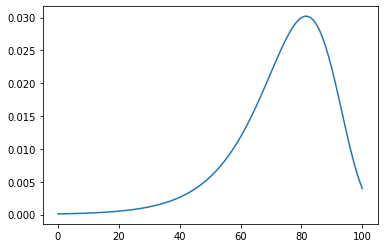

In [22]:
plt.plot(x, fx)
plt.show()

2. Olhando a curva, é possível ver que: 
* P(X<40) é aproximadamente igual a 0.03
* A probabilidade é máxima aos 80 anos, aproximadamente
* A probabilidade de morrer com mais de 100 anos é maior do que a de morrer antes de completar 10 anos de idade

3. Função de densidade de probabilidade acumulada inversa

$F^{-1}(u) = \frac{log(1 - log(c) \frac{log(1-u)}{B})}{log(c)} $

4. Utilizando o método da transformada inversa para gerar 50000 valores independentes

In [25]:
def trans_inv(N, B, c):
    values = []
    for _ in range(N):
        u = stats.uniform.rvs() 
        tmp = 1 - (log(c)*log(1-u)/B)
        values.append(log(tmp) / log(c))
    return values

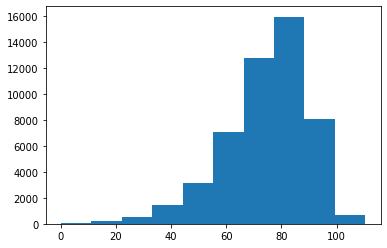

In [26]:
values = trans_inv(50000, B, c)
plt.hist(values)
plt.show()

5. Calculando $P(X > 80| X > 50)$ pelos valores simulados, ou seja, frequência de números maiores que 80 dividido pela frequência de números maiores que 50. O resultado obtido foi de 0.45.

In [29]:
P80 = sum(x > 80 for x in values)
P50 = sum(x > 50 for x in values)
P80/P50

0.4467750280244891

6. Calculando probabilidade de perda de uma seguradora que cobra 2 mil por apólice e paga 100 mil a um beneficiário no momento em que o segurado morre. O dinheiro é colocado para rendimento de 2*exp(0.05t). O resultado obtido foi de que a seguradora tem probabilidade de perda de 0.53

In [45]:
values = np.asarray(values)
lucro = 2000 * np.exp(0.05 * values) - 100000
N_perda = sum(lucro < 0)
P_perda = N_perda / np.size(values)
P_perda

0.53312

## Exercício 7

Usando Importance Sampling para estimar valores associados com X, uma v.a. com distribuição Gama com parâmetros $\alpha$ = 3 e $\beta$ = 2.

Esperança obtida igual a 1.67, próximo da esperança analítica (1.5).

Desvio padrão obtido igual a 0.73, próximo do desvio padrão analítico (0.75)

In [67]:
N = 200
U = np.asarray(stats.uniform.rvs(size=N))
exp = -1* np.log(U)
W = 4.5 * exp**2 * np.exp(-1*exp) 

In [68]:
ESP = np.sum(exp*W) / N
ESP

1.6782233769216957

In [69]:
exp_x2 = exp**2
ESP_X2 = np.sum(exp_x2*W) / N

desvio_padrao = sqrt(ESP_X2 - ESP**2)
desvio_padrao

0.7366979265680739